<p><h3>
This notebook uses Facebook Prophet for analyzing time series.</h3></p>
<p>Want more information?  <a href="https://facebookincubator.github.io/prophet/">Facebook Prophet</a></p>
<p>Prophet is a procedure for forecasting time series data. It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. It works best with daily periodicity data with at least one year of historical data. Prophet is robust to missing data, shifts in the trend, and large outliers.</p><p>

Prophet is open source software released by Facebook’s Core Data Science team.</p>
<p>Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.</p><p>

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column must contain a date or datetime (either is fine). The y column must be numeric, and represents the measurement we wish to forecast.</p>

In [2]:
#see https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
#you need to install fbprophet and there are a few other requirements
#be sure to start with digital ocean or Facebook Prophet page
#run pip commands in Anaconda prompt to install necessary libraries
#want to work in R? Facebook Prophet is available in R also
#make sure you run correct kernel 
#another great resource
# http://pythondata.com/forecasting-time-series-data-with-prophet-part-1/
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [23]:
#always use forward slash in path names
df = pd.read_csv('runnertest1.csv')

df.head(5)

,id,date,time_sec
0,1,9/11/2010,1307.00
1,2,9/25/2010,1318.80
2,3,10/2/2010,1230.00
3,4,9/10/2011,1200.00
4,5,9/24/2011,1280.59


In [24]:
#lets check the types of our objects
#Prophet library needs one column with time
#and one column with metric we wish to forecast
df.dtypes

id            int64
date         object
time_sec    float64
dtype: object

In [25]:
#DATE is not of type date and we need to convert it
df['date'] = pd.DatetimeIndex(df['date'])
df.dtypes

id                   int64
date        datetime64[ns]
time_sec           float64
dtype: object

<p>Prophet also imposes the strict condition that the input columns be named ds (the time column) and y (the metric column), so let's rename the columns in our DataFrame:</p>

In [26]:
df = df.rename(columns={'date': 'ds',
                        'time_sec': 'y'})

df.head(5)

,id,ds,y
0,1,2010-09-11,1307.00
1,2,2010-09-25,1318.80
2,3,2010-10-02,1230.00
3,4,2011-09-10,1200.00
4,5,2011-09-24,1280.59


<p>it is a good idea to visualize the time series</p>

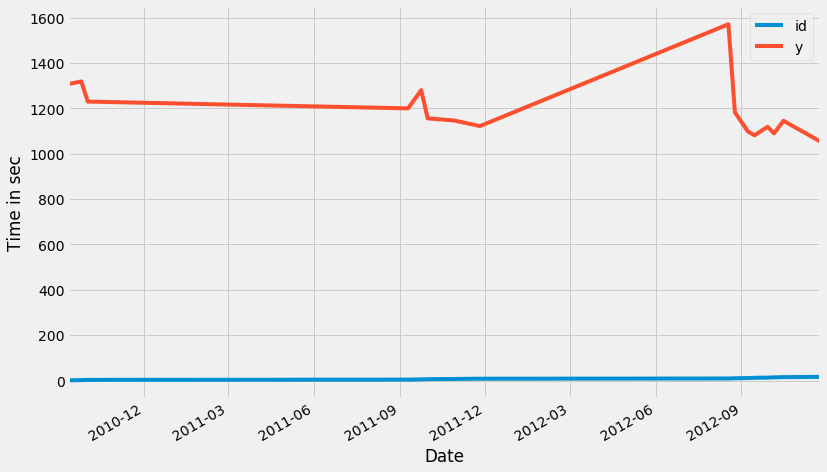

In [32]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Time in sec')
ax.set_xlabel('Date')

plt.show()

<p>With our data now prepared, we are ready to use the Prophet library to produce forecasts of our time series.</p>
<h3>Time Series Forecasting with Prophet in Python</p>

<p>In this section, we will describe how to use the Prophet library to predict future values of our time series. The authors of Prophet have abstracted away many of the inherent complexities of time series forecasting and made it more intuitive for analysts and developers alike to work with time series data.

To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.</p>

In [33]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

<p>Now that our Prophet model has been initialized, we can call its fit method with our DataFrame as input. The model fitting should take no longer than a few seconds.</p>

In [35]:
my_model.fit(df)

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


<p>Later we will experiment with converting the non-stationary data to stationary.</p>
<p>For right now - in order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions. Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function:</p>

In [36]:
future_dates = my_model.make_future_dataframe(periods=3, freq='MS')
future_dates.tail()

,ds
14,2012-10-16
15,2012-11-24
16,2012-12-01
17,2013-01-01
18,2013-02-01


<p>When working with Prophet, it is important to consider the frequency of our time series. Because we are making the assumption that the data is monthly due to uneven time series, we clearly specified the desired frequency of the timestamps (in this case, WS is the start of the month). Therefore, the make_future_dataframe generated 3 monthly timestamps for us. In other words, we are looking to predict future values of our time series 3 months into the future.</p><p>

The DataFrame of future dates is then used as input to the predict method of our fitted model.</p>

In [37]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
0,2010-09-11,1291.376175,1242.278047,1347.349757
1,2010-09-25,1309.062590,1254.834601,1362.892033
2,2010-10-02,1261.913192,1210.372032,1315.389855
3,2011-09-10,1186.843980,1135.589962,1239.745447
4,2011-09-24,1232.557817,1183.423920,1284.175736
5,2011-10-01,1179.222350,1129.272542,1234.318468
6,2011-10-29,1150.097328,1098.590347,1203.002263
7,2011-11-26,1127.787322,1076.795793,1182.559950
8,2012-08-18,1563.648820,1510.320400,1616.971090
9,2012-08-25,1196.957551,1140.697480,1248.317604


<p>Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:
</p><ul>
    <li>ds: the datestamp of the forecasted value
    <li>yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
    <li>yhat_lower: the lower bound of our forecasts
    <li>yhat_upper: the upper bound of our forecasts
</ul>
<p>A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.
</p>
<p>Prophet also provides a convenient function to quickly plot the results of our forecasts: see below</p>

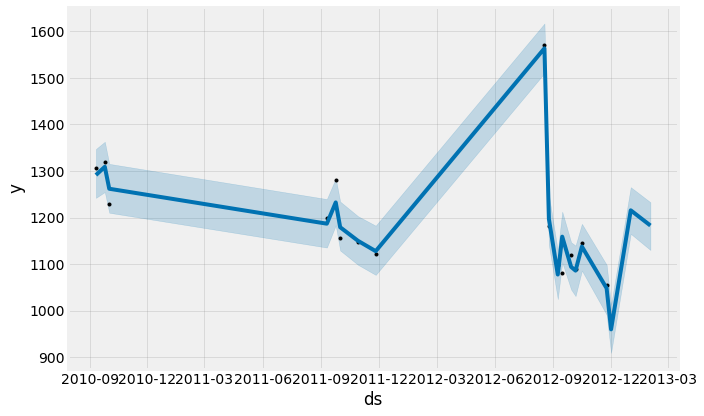

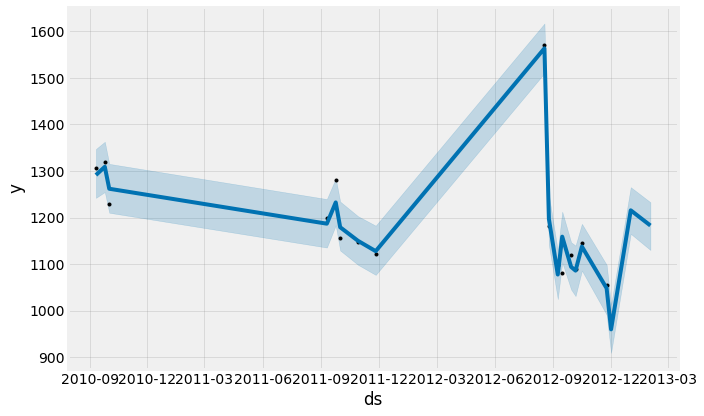

In [38]:
my_model.plot(forecast,
              uncertainty=True)

<p>Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).</p>

<p>One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values: see below</p>

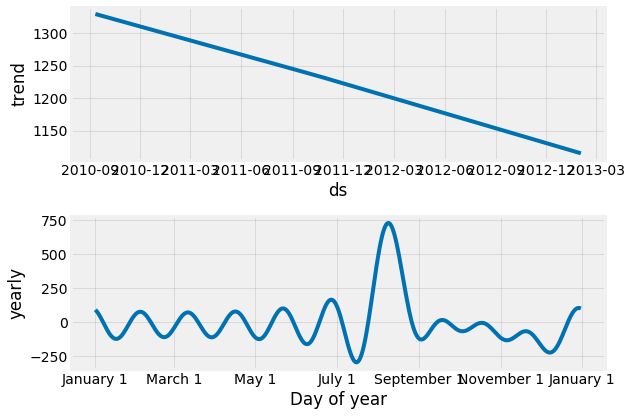

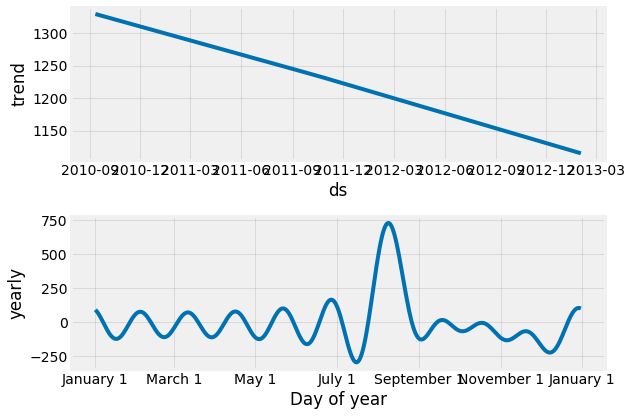

In [39]:
my_model.plot_components(forecast)

<p>The plot above provides interesting insights. </p>
<p>The first plot shows that time in sec is decreasing over time. </p>
<p>The second plot highlights the fact that there are peaks (irregularities)</p>
<p>The third plot shows that the max time occurs at the beginning of a season</p>

<p>Another consideration: we can apply a log transform to the ‘y’ variable to a try to convert non-stationary data to stationary. This also converts trends to more linear trends (see this website for more info). This isn’t always a perfect way to handle time-series data, but it works often enough that it can be tried initially without much worry.

To log-tranform the data, we can use np.log() on the ‘y’ column like this:</p>

In [40]:
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
df['y'] = np.log(df['y'])

<p>now lets visualize the data once again</p>

In [41]:
df.head(5)

,id,ds,y,y_orig
0,1,2010-09-11,7.175490,1307.00
1,2,2010-09-25,7.184478,1318.80
2,3,2010-10-02,7.114769,1230.00
3,4,2011-09-10,7.090077,1200.00
4,5,2011-09-24,7.155076,1280.59


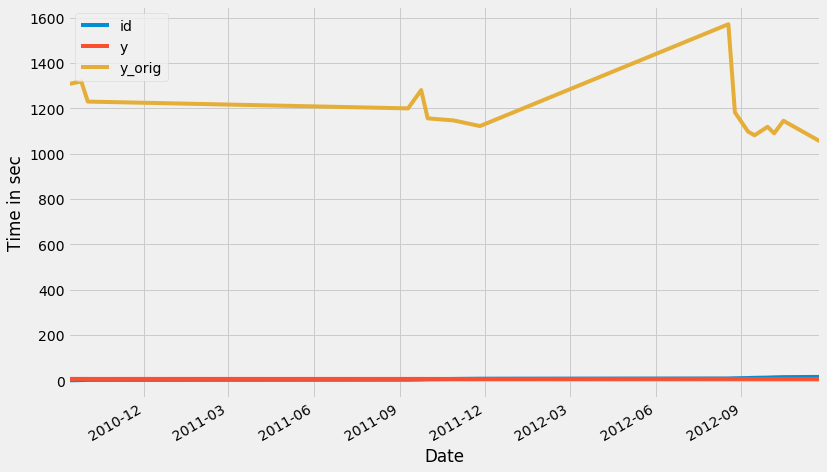

In [42]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Time in sec')
ax.set_xlabel('Date')

plt.show()

In [43]:
#iinstantiate the object again to avoid error
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
#
my_model.fit(df)
future_dates = my_model.make_future_dataframe(periods=3, freq='MS')
future_dates.tail()
#
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#



Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
14,2012-10-16,7.048912,7.005984,7.085608
15,2012-11-24,6.961773,6.921789,7.001249
16,2012-12-01,6.440974,6.402195,6.481918
17,2013-01-01,7.439080,7.397334,7.481432
18,2013-02-01,5.371785,5.332434,5.410334


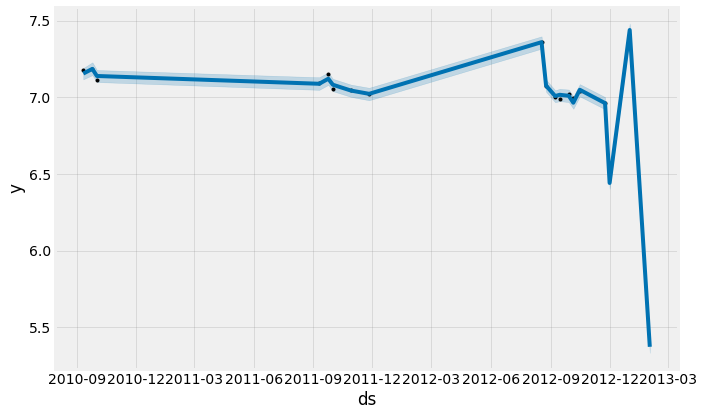

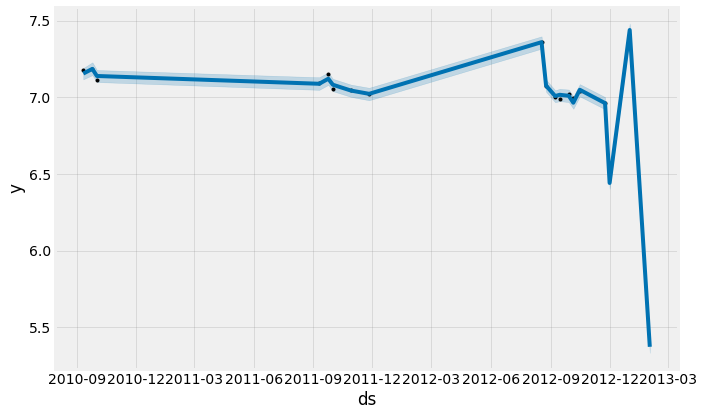

In [44]:
my_model.plot(forecast,
              uncertainty=True)

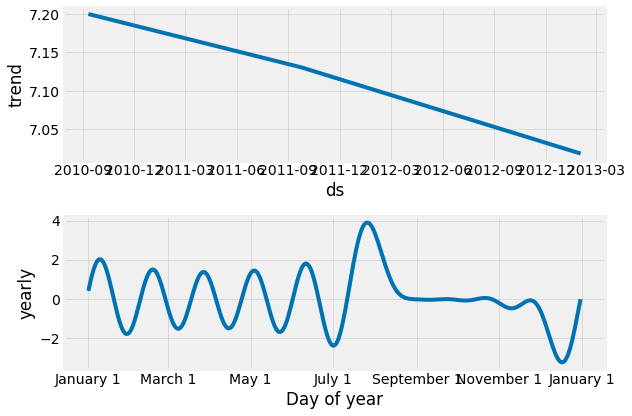

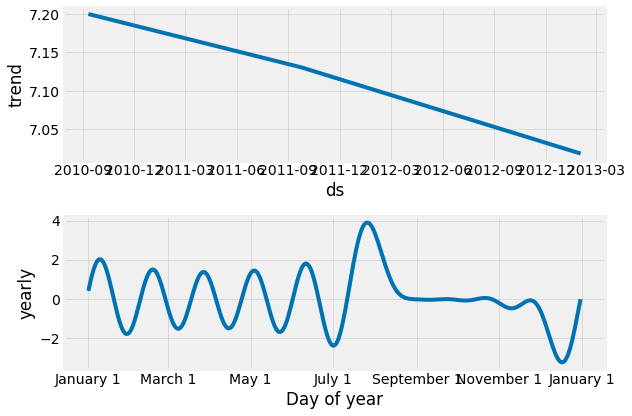

In [45]:
my_model.plot_components(forecast)

<p>Looks a little strange so lets see this in the original units.</p>

In [46]:
forecast_data_orig = forecast # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])
#
forecast_data_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
14,2012-10-16,1151.604907,1103.214699,1194.649818
15,2012-11-24,1055.503140,1014.132714,1098.003334
16,2012-12-01,627.017308,603.167702,653.222430
17,2013-01-01,1701.184564,1631.629077,1774.780973
18,2013-02-01,215.246700,206.941115,223.706371


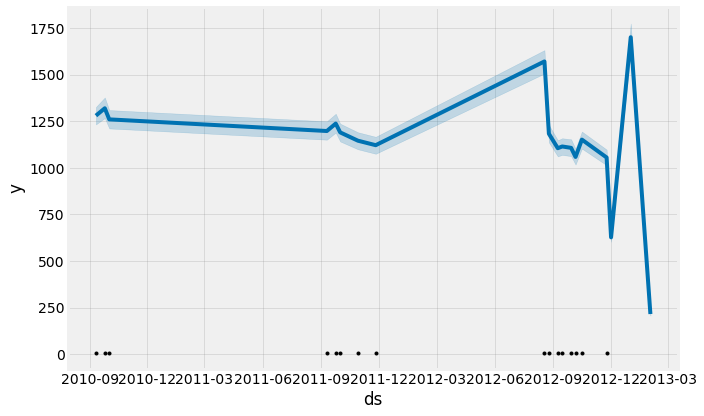

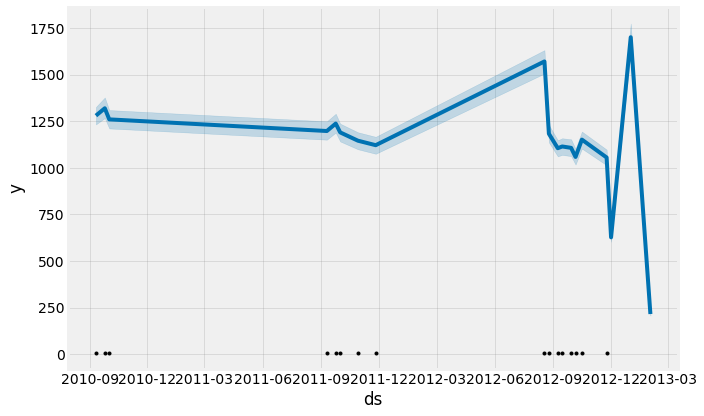

In [47]:
my_model.plot(forecast_data_orig)

<p>The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge.</p>

<p>Visiting the Facebook Prophet page can provide much more useful information</p>
<p><a href="https://facebookincubator.github.io/prophet/docs/trend_changepoints.html">Changepoints</a></p>
<p>Changepoints (like the first time in a season) can be specified to adjust the forecast.  The changepoints are determined automatically but this can give more control</p>

<p>Here is the Github page:</p>
    <p><a href="https://github.com/facebookincubator/prophet">Prophet Github</a></p>


<p>Analysis of results</p>
<img src="files/prophetpred.png">

<p>References:</p>
<p><a href="https://facebookincubator.github.io/prophet/static/prophet_paper_20170113.pdf">Facebook Prophet Paper</a></p>
